# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_curve
sns.set_theme()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header = 0)


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Get key statistics for each column
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# renaming features and labels
df.columns = ['age',
              'workclass',
              'final_weight',
              'education',
              'education_num',
              'marital_status',
              'occupation',
              'relationship',
              'race',
              'sex',
              'capital_gain',
              'capital_loss',
              'hours_per_week',
              'native_country',
              'income']
df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K


In [6]:
#inspect the data type of each column 
df.dtypes

age               float64
workclass          object
final_weight        int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
native_country     object
income             object
dtype: object

In [7]:
# performing one-hot encoding on categorical features
# addressing class imbalance in your data sample to promote fair AI

In [8]:
#drop the final weight and education column 
#experiment with just a few and then a lot 
df.drop(["final_weight","education"],axis=1,inplace=True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [9]:
# change native_country to US or not US 
def us_or_non_us(country):
    if country == 'United-States':
        return 'US'
    else:
        return 'Non-US'

# Apply the function to the 'native_countries' column and create a new column 'us_status'
df['us_status'] = df['native_country'].apply(us_or_non_us)
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,us_status
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,US
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,US
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,US
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,US
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,Non-US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,US
32557,40.0,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K,US
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,US
32559,22.0,Private,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K,US


In [10]:
def educated(years):
    if years >= 9:
        return 'High'
    else:
        return 'Low'

# Apply the function to the 'native_countries' column and create a new column 'us_status'
df['education_level'] = df['education_num'].apply(educated)
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,us_status,education_level
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,US,High
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,US,High
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,US,High
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,US,Low
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,Non-US,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,US,High
32557,40.0,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K,US,High
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,US,High
32559,22.0,Private,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K,US,High


In [11]:
df.drop(["native_country","education_num","relationship"], axis = 1, inplace = True)

In [12]:
# addressing missingness, such as replacing missing values with means
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                 162
workclass          1836
marital_status        0
occupation         1843
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week      325
income                0
us_status             0
education_level       0
dtype: int64

In [13]:
mean_ages=df['age'].mean()
print("mean value for all age columns: " + str(mean_ages))

# fill all missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)

mean value for all age columns: 38.58921571653446


In [14]:
mean_hours = df["hours_per_week"].mean()
df["hours_per_week"].fillna(value = mean_hours, inplace = True)

In [15]:
#because there are too many nan values and the val is not numerical in the "work class" and "occupation" column (also hard to predcit from other features, 
#we will just drop them for the purpose of this project
df.drop(["workclass","occupation"], axis = 1, inplace = True)

In [16]:
df.isna().sum()>0

age                False
marital_status     False
race               False
sex                False
capital_gain       False
capital_loss       False
hours_per_week     False
income             False
us_status          False
education_level    False
dtype: bool

In [17]:
# finding and replacing outliers
np.percentile(df['hours_per_week'], 90)

55.0

In [18]:
df['hours_per_week_win'] = stats.mstats.winsorize(df['hours_per_week'], limits=[0.1, 0.1])
df.head(15)

,age,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,income,us_status,education_level,hours_per_week_win
0,39.0,Never-married,White,Non-Female,2174,0,40.0,<=50K,US,High,40.0
1,50.0,Married-civ-spouse,White,Non-Female,0,0,13.0,<=50K,US,High,25.0
2,38.0,Divorced,White,Non-Female,0,0,40.0,<=50K,US,High,40.0
3,53.0,Married-civ-spouse,Black,Non-Female,0,0,40.0,<=50K,US,Low,40.0
4,28.0,Married-civ-spouse,Black,Female,0,0,40.0,<=50K,Non-US,High,40.0
5,37.0,Married-civ-spouse,White,Female,0,0,40.0,<=50K,US,High,40.0
6,49.0,Married-spouse-absent,Black,Female,0,0,16.0,<=50K,Non-US,Low,25.0
7,52.0,Married-civ-spouse,White,Non-Female,0,0,45.0,>50K,US,High,45.0
8,31.0,Never-married,White,Female,14084,0,50.0,>50K,US,High,50.0
9,42.0,Married-civ-spouse,White,Non-Female,5178,0,40.0,>50K,US,High,40.0


In [19]:
zeros_count = (df["capital_loss"] == 0).sum()
zeros_count

31042

In [20]:
#too many zeros in the column so drop it with winsorzied column
df.drop(["capital_loss", "hours_per_week"], axis = 1, inplace = True)
df

,age,marital_status,race,sex,capital_gain,income,us_status,education_level,hours_per_week_win
0,39.0,Never-married,White,Non-Female,2174,<=50K,US,High,40.0
1,50.0,Married-civ-spouse,White,Non-Female,0,<=50K,US,High,25.0
2,38.0,Divorced,White,Non-Female,0,<=50K,US,High,40.0
3,53.0,Married-civ-spouse,Black,Non-Female,0,<=50K,US,Low,40.0
4,28.0,Married-civ-spouse,Black,Female,0,<=50K,Non-US,High,40.0
...,...,...,...,...,...,...,...,...,...
32556,27.0,Married-civ-spouse,White,Female,0,<=50K,US,High,38.0
32557,40.0,Married-civ-spouse,White,Non-Female,0,>50K,US,High,40.0
32558,58.0,Widowed,White,Female,0,<=50K,US,High,40.0
32559,22.0,Never-married,White,Non-Female,0,<=50K,US,High,25.0


In [21]:
#creating binary values
#convert labels to True/False
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df

,age,marital_status,race,sex,capital_gain,income,us_status,education_level,hours_per_week_win
0,39.0,Never-married,White,Non-Female,2174,0,US,High,40.0
1,50.0,Married-civ-spouse,White,Non-Female,0,0,US,High,25.0
2,38.0,Divorced,White,Non-Female,0,0,US,High,40.0
3,53.0,Married-civ-spouse,Black,Non-Female,0,0,US,Low,40.0
4,28.0,Married-civ-spouse,Black,Female,0,0,Non-US,High,40.0
...,...,...,...,...,...,...,...,...,...
32556,27.0,Married-civ-spouse,White,Female,0,0,US,High,38.0
32557,40.0,Married-civ-spouse,White,Non-Female,0,1,US,High,40.0
32558,58.0,Widowed,White,Female,0,0,US,High,40.0
32559,22.0,Never-married,White,Non-Female,0,0,US,High,25.0


In [22]:
df["marital_status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [23]:
df['marital_status'] = df['marital_status'].apply(lambda status: 'Married' if 'Married' in status else 'Not Married')

In [24]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Inuit',
       'Other'], dtype=object)

In [25]:
df["sex"].unique()

array(['Non-Female', 'Female'], dtype=object)

<Figure size 432x288 with 0 Axes>

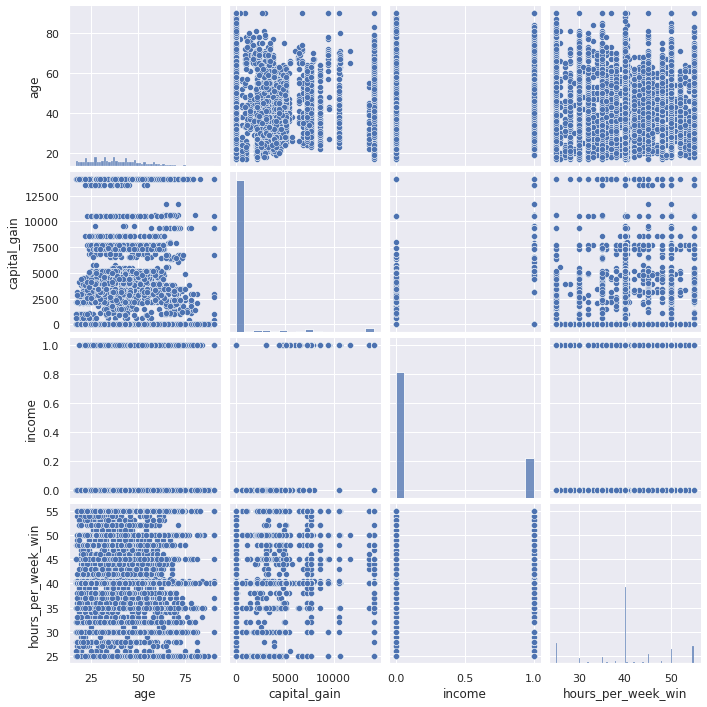

In [26]:
plt.figure()
sns.pairplot(data=df)
plt.show()

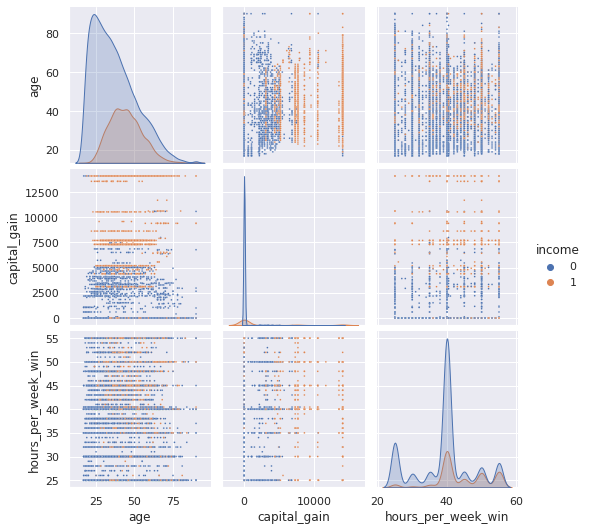

In [27]:
sns.pairplot(data=df, hue = 'income', plot_kws={'s':3})

In [28]:
df = pd.get_dummies(df, columns = ['marital_status', 'race','sex','us_status','education_level'])
df

,age,capital_gain,income,hours_per_week_win,marital_status_Married,marital_status_Not Married,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Non-Female,us_status_Non-US,us_status_US,education_level_High,education_level_Low
0,39.0,2174,0,40.0,0,1,0,0,0,0,1,0,1,0,1,1,0
1,50.0,0,0,25.0,1,0,0,0,0,0,1,0,1,0,1,1,0
2,38.0,0,0,40.0,0,1,0,0,0,0,1,0,1,0,1,1,0
3,53.0,0,0,40.0,1,0,0,0,1,0,0,0,1,0,1,0,1
4,28.0,0,0,40.0,1,0,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,0,0,38.0,1,0,0,0,0,0,1,1,0,0,1,1,0
32557,40.0,0,1,40.0,1,0,0,0,0,0,1,0,1,0,1,1,0
32558,58.0,0,0,40.0,0,1,0,0,0,0,1,1,0,0,1,1,0
32559,22.0,0,0,25.0,0,1,0,0,0,0,1,0,1,0,1,1,0


In [29]:
df.dtypes

age                           float64
capital_gain                    int64
income                          int64
hours_per_week_win            float64
marital_status_Married          uint8
marital_status_Not Married      uint8
race_Amer-Indian-Inuit          uint8
race_Asian-Pac-Islander         uint8
race_Black                      uint8
race_Other                      uint8
race_White                      uint8
sex_Female                      uint8
sex_Non-Female                  uint8
us_status_Non-US                uint8
us_status_US                    uint8
education_level_High            uint8
education_level_Low             uint8
dtype: object

In [30]:
#since the percentage of positive cases is almost 20%, we will not address class imbalance for now
(df["income"] == 'True').sum(axis=0)

0

In [31]:
df.isnull().values.any()

False

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [32]:
# Create labeled exampels
y = df["income"]
X = df.drop(columns = "income", axis = 1)

In [33]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [34]:
print(X_train.shape)
print(X_test.shape)

(22792, 16)
(9769, 16)


In [35]:
#create Logistic regression model
model_default = LogisticRegression(max_iter = 1000)
model_default.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#make prediction
proba_predictions_default = model_default.predict_proba(X_test)[:, 1].tolist()
class_label_predictions_default = model_default.predict(X_test)

In [37]:
# Create a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_default, labels = [True,False])

# Create a Pandas DataFrame out of the confusion matrix for display
pd.DataFrame(c_m, columns = ['Predicted: Income is over 50k', 'Predicted: Income is not over 50k'], index = ['Actual: Income is over 50k', 'Actual: Income is not over 50k'] )


,Predicted: Income is over 50k,Predicted: Income is not over 50k
Actual: Income is over 50k,1025,1275
Actual: Income is not over 50k,639,6830


In [38]:
#set up a parameter grid
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [2.1612861987071401e-07,
  6.329639078443205e-07,
  1.8537263083122183e-06,
  5.428905477141383e-06,
  1.589933451749429e-05,
  4.656349961581807e-05,
  0.0001363679400597948,
  0.0003993732264452582,
  0.0011696222288857495,
  0.0034254077832911053,
  0.010031801886160478,
  0.02937958206730109,
  0.08604235333236225,
  0.25198747041438685,
  0.7379817355827569,
  2.16128619870714]}

In [39]:
#perform grid search cross-validation
print('Running Grid Search...')

model = LogisticRegression(max_iter = 1000)

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [40]:
#find best c
best_c = grid_search.best_estimator_.C
best_c

0.25198747041438685

In [41]:
#create the model with best C value
model_best = LogisticRegression(max_iter = 1000,C = best_c)
model_best.fit(X_train, y_train)

LogisticRegression(C=0.25198747041438685, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#evaluate the result again
proba_predictions_best = model_best.predict_proba(X_test)[:,1].tolist()

class_label_predictions_best = model_best.predict(X_test)

In [43]:
#Evaluate the accuracy of the model using a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_best, labels = [True, False])
pd.DataFrame(c_m, columns = ['Predicted: Income is over 50k', 'Predicted: Income is not over 50k'], index = ['Actual: Income is over 50k', 'Actual: Income is not over 50k'] )


,Predicted: Income is over 50k,Predicted: Income is not over 50k
Actual: Income is over 50k,1007,1293
Actual: Income is not over 50k,629,6840


In [44]:
#plot precision-recall curves for both models
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)


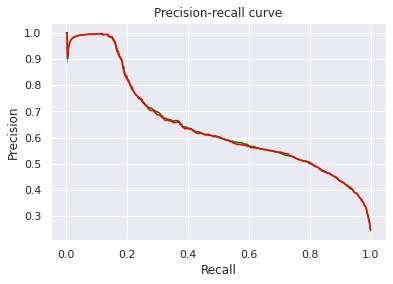

In [45]:
# precision recall curve for both models
fig = plt.figure()
fig.add_subplot(111)
sns.lineplot(x= recall_default, y = precision_default, color = "green")
sns.lineplot(x=recall_best, y = precision_best, color = "red")

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
fig.show()

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [47]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

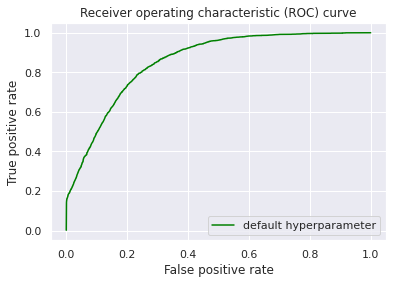

In [48]:
#ROC Curve for Default Hyperparameter
fig = plt.figure()
sns.lineplot(x=fpr_default, y = tpr_default, color = "green")
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(["default hyperparameter"])
plt.show()

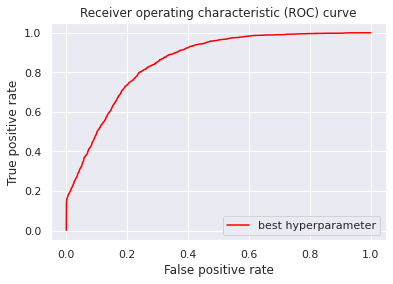

In [49]:
#ROC Curve for best Hyperparameter
fig = plt.figure()
sns.lineplot(x=fpr_best, y = tpr_best, color = "red")
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(["best hyperparameter"])
plt.show()

In [50]:
#auc value
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)
print(auc_default)
print(auc_best)

0.8540655870351074
0.8539017504234896


In [51]:
# Feature Selection Using SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# top 5 features
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


# Initialize a LogisticRegression model object with the best value of hyperparameter C 
model = LogisticRegression(max_iter=1000, C = best_c)
# Fit the model to the new training data
model.fit(new_X_train, y_train)
# Use the predict_proba() method to use your model to make predictions on the new test data 
proba_predictions = model.predict_proba(new_X_test)[:,1].tolist()
    
# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)

Best 5 features:
Index(['age', 'capital_gain', 'hours_per_week_win', 'marital_status_Married',
       'marital_status_Not Married'],
      dtype='object')
0.8408619686006509


In [52]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
knn_pred = knn.predict(X_test)

In [55]:
#evalute knn model
acc_score = accuracy_score(y_test,knn_pred)
acc_score

0.8151294912478247

In [56]:
#confusion matrix
c_m = confusion_matrix(y_test, knn_pred, labels = [True, False])
pd.DataFrame(c_m, columns = ['Predicted: Income is over 50k', 'Predicted: Income is not over 50k'], index = ['Actual: Income is over 50k', 'Actual: Income is not over 50k'] )


,Predicted: Income is over 50k,Predicted: Income is not over 50k
Actual: Income is over 50k,1119,1181
Actual: Income is not over 50k,625,6844


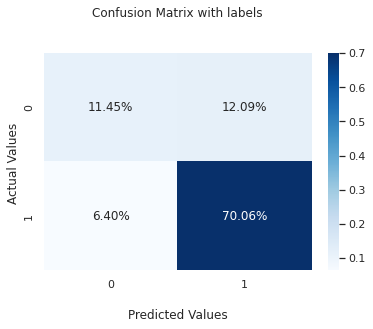

In [57]:
ax = sns.heatmap(c_m/np.sum(c_m), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [58]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    model = KNeighborsClassifier(k)

    model.fit(X_train,y_train)
    
    class_label_predictions = model.predict(X_test)

    acc_score = accuracy_score(y_test,class_label_predictions)
    
    return acc_score
    

In [59]:
k_values = [10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))
    

k=10, accuracy score: 0.8151294912478247
k=100, accuracy score: 0.8098065308629337
k=1000, accuracy score: 0.8068379568021292


In [63]:
#50 KNN classifiers with different values of k (1-50)
acc1_50 = [] 

for k in range(1,51):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    acc1_50.append(float(score))

In [ ]:
# 50 KNN with only first 50 examples
acc2_50 = []
for k in range(1,51):
    score = train_test_knn(X_train[:100], X_test, y_train[:100], y_test, k)
    acc2_50.append(float(score))
    

In [ ]:
x = [i for i in range(1,51)]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = plt.plot(x, acc1_50, 'b-', label = 'Full training set')
p2 = plt.plot(x, acc2_50, 'r-', label = 'First 100 of the training examples') 

plt.title('Accuracy of the kNN predictions, for $k\in(1, 50), k\in\mathbb{N}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()